In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/cars-image-dataset
/kaggle/input/cars-image-dataset/Cars Dataset
/kaggle/input/cars-image-dataset/Cars Dataset/test
/kaggle/input/cars-image-dataset/Cars Dataset/test/Hyundai Creta
/kaggle/input/cars-image-dataset/Cars Dataset/test/Tata Safari
/kaggle/input/cars-image-dataset/Cars Dataset/test/Swift
/kaggle/input/cars-image-dataset/Cars Dataset/test/Mahindra Scorpio
/kaggle/input/cars-image-dataset/Cars Dataset/test/Toyota Innova
/kaggle/input/cars-image-dataset/Cars Dataset/test/Rolls Royce
/kaggle/input/cars-image-dataset/Cars Dataset/test/Audi
/kaggle/input/cars-image-dataset/Cars Dataset/train
/kaggle/input/cars-image-dataset/Cars Dataset/train/Hyundai Creta
/kaggle/input/cars-image-dataset/Cars Dataset/train/Tata Safari
/kaggle/input/cars-image-dataset/Cars Dataset/train/Swift
/kaggle/input/cars-image-dataset/Cars Dataset/train/Mahindra Scorpio
/kaggle/input/cars-image-dataset/Cars Dataset/train/Toyota Innova
/kaggle/input/cars-image-dataset/Cars Datase

## Hello Guys!

Here we are going to create a Convolution Neural Network(CNN) model on **Car Images Dataset** which is used to predict cars of seven category i.e Audi,Hyundai Creta,Mahindra Scorpio,Rolls Royce,Maruti Suzuki Swift,Tata Safari and Toyota Innova.

## Why CNN?

As we know that image classification involves extraction of features from the image to observe some patterns in the dataset.
The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer(dense layer) where all the neurons are connected to each other and the output is processed.CNNs are very effective in reducing the number of parameters without losing on the quality of models. Images have high dimensionality (as each pixel is considered as a feature) which suits the above described abilities of CNNs.In CNN dimensionalty reduction is achieved using a sliding window with a size less than that of the input matrix. 

## Importing the required libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

## Importing data into tensorflow dataset object

### Lets we understand what ImageDataGenerator do...

This will run through image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training.<br/>
The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in the data such as where features are located in the image. 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [20]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.         0.05875906 0.1098813 ]
  [0.00350504 0.06433146 0.11581257]
  [0.00710035 0.06998122 0.12197595]
  ...
  [0.78823537 0.8117648  0.86666673]
  [0.78823537 0.8117648  0.8664898 ]
  [0.78823537 0.81181943 0.85865957]]

 [[0.         0.03932012 0.13320804]
  [0.         0.04188819 0.13012633]
  [0.         0.04445627 0.12704463]
  ...
  [0.78823537 0.8117648  0.86666673]
  [0.78823537 0.8117648  0.8654626 ]
  [0.78823537 0.81233305 0.8571187 ]]

 [[0.06960427 0.1552228  0.34987995]
  [0.06035919 0.13981435 0.3211175 ]
  [0.05111412 0.12440588 0.29235503]
  ...
  [0.78823537 0.8117648  0.86666673]
  [0.78823537 0.8117648  0.8644353 ]
  [0.78823537 0.81284666 0.8555779 ]]

 ...

 [[0.24601595 0.29861197 0.4220166 ]
  [0.49274293 0.49343032 0.4802644 ]
  [0.5158346  0.49138287 0.46155837]
  ...
  [0.91940963 0.79391944 0.64489985]
  [0.9245458  0.79905564 0.650036  ]
  [0.929682   0.80419177 0.65517217]]

 [[0.30251366 0.34483737 0.44410205]
  [0.4989063  0.496512   0.47204655]


In [21]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [22]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [23]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.2480237  0.2480237  0.2872394 ]
  [0.24794866 0.24794866 0.28716436]
  [0.24482574 0.24482574 0.2840414 ]
  ...
  [0.3128371  0.30691797 0.35693637]
  [0.3235648  0.30980393 0.3637432 ]
  [0.3254902  0.30388767 0.35878962]]

 [[0.2509804  0.2509804  0.2901961 ]
  [0.2509804  0.2509804  0.2901961 ]
  [0.24785747 0.24785747 0.28707317]
  ...
  [0.3132123  0.30714306 0.3572365 ]
  [0.32371488 0.30980393 0.36381823]
  [0.3254902  0.30373758 0.35863954]]

 [[0.2509804  0.2509804  0.2901961 ]
  [0.2509804  0.2509804  0.2901961 ]
  [0.24844572 0.24844572 0.2876614 ]
  ...
  [0.32733318 0.32111388 0.37128234]
  [0.30637974 0.29231873 0.34640807]
  [0.3208473  0.2989446  0.35384655]]

 ...

 [[0.72927207 0.70052487 0.7903622 ]
  [0.65464896 0.62673366 0.72044367]
  [0.6449598  0.6221554  0.7219411 ]
  ...
  [0.591828   0.58475673 0.6738625 ]
  [0.6533272  0.6543013  0.74107546]
  [0.64837456 0.64904845 0.7362729 ]]

 [[0.692861   0.6732532  0.7595277 ]
  [0.6373321  0.61772424 0.7047377 ]


## Creating the CNN model

### How to stack up layers?

There are three types of layers that make up the CNN which are the convolutional layers, pooling layers, and fully-connected layers. When these layers are stacked, a CNN architecture will be formed.<br/>
**Convolution->Relu->Pooling->Convolution->Relu->Pooling->Flattening->Fully Connected layer**

CNN Layer-This layer is the first layer that is used to extract the various features from the input images.

Pooling layer-It is to decrease the size of the convolved feature map to reduce the computational costs. This is performed by decreasing the connections between layers and independently operates on each feature map.

Fully Connected layer-It consists of the weights and biases along with the neurons and is used to connect the neurons between two different layers.

Dropout-To overcome overfitting problem, a dropout layer is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model.

Relu Activation Function-It decides which information of the model should be send in the forward direction and which ones should not at the end of the network.

In [24]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                2764896   
_________________________________________________________________
dropout (Dropout)            (None, 96)                0

## Compiling the model

In [26]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [27]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 50s 410ms/step - loss: 1.8768 - accuracy: 0.2587 - val_loss: 1.7737 - val_accuracy: 0.3087
Epoch 2/50
105/105 [==============================] - 21s 200ms/step - loss: 1.7246 - accuracy: 0.3437 - val_loss: 1.5748 - val_accuracy: 0.4145
Epoch 3/50
105/105 [==============================] - 21s 197ms/step - loss: 1.5349 - accuracy: 0.4460 - val_loss: 1.3930 - val_accuracy: 0.5129
Epoch 4/50
105/105 [==============================] - 21s 200ms/step - loss: 1.4029 - accuracy: 0.5000 - val_loss: 1.2712 - val_accuracy: 0.5523
Epoch 5/50
105/105 [==============================] - 21s 198ms/step - loss: 1.3062 - accuracy: 0.5361 - val_loss: 1.2126 - val_accuracy: 0.5658
Epoch 6/50
105/105 [==============================] - 21s 199ms/step - loss: 1.1902 - accuracy: 0.5764 - val_loss: 1.1364 - val_accuracy: 0.5916
Epoch 7/50
105/105 [==============================] - 21s 203ms/step - loss: 1.1140 - accuracy: 0.6023 - val_loss: 1.0753 - val_ac

In [28]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 5s 177ms/step - loss: 1.1508 - accuracy: 0.7269


In [29]:
scores

[1.1508318185806274, 0.7269372940063477]

## Plotting the accuracy and loss curves

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
type(history.history['loss'])

list

In [32]:
len(history.history['loss'])

50

In [33]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.8767870664596558,
 1.7246067523956299,
 1.5348988771438599,
 1.4028916358947754,
 1.3061695098876953]

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

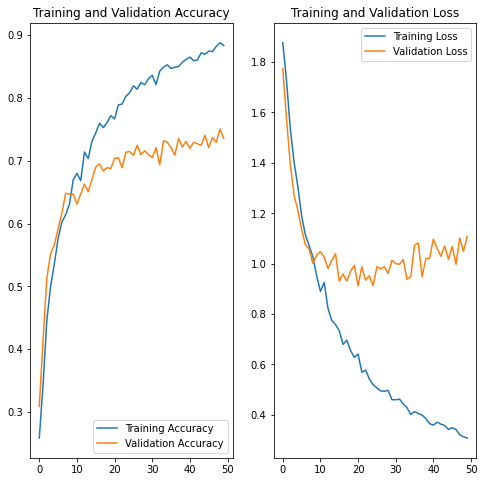

In [35]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing the prediction on sample of image from test dataset

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

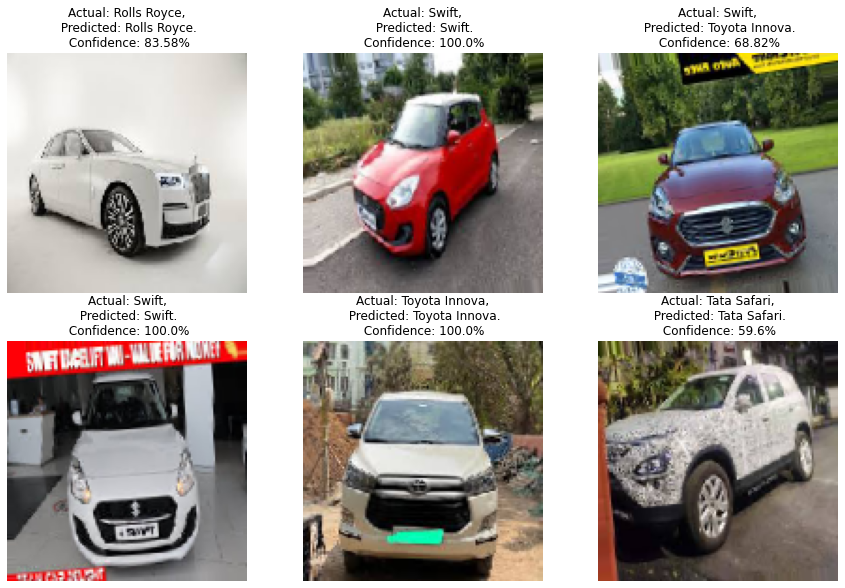

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

#### Thus, here almost all the images are predicted accurately.

## If you find this notebook useful please upvote it!